In [ ]:
from google.colab import files    # upload
import numpy as np                # mathematical calculations
from io import BytesIO            # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from mpl_toolkits import mplot3d  # 3D plots
import cv2 as cv2
from google.colab import files, drive    # upload


import time
from IPython import display
import random

In [ ]:
drive.mount('drive')
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Fish Pic 2.jpg")
im = np.array(img)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


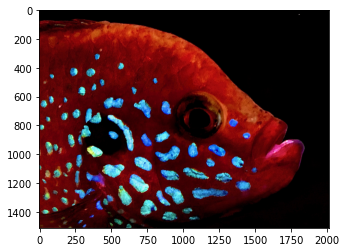

In [ ]:
plt.imshow(im)

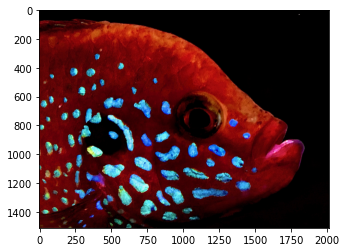

In [ ]:
#crop = im[1200:3000, 1000:2200]
crop = im
plt.imshow(crop)

In [ ]:
def greyscale(image):
  """
  Given a coloured rgb image, return the greyscale image.
  input:
    image - np array 3d
  output:
    grey - np array 2d
  """
  grey = 0.3*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]
  grey = grey/grey.max()
  return grey

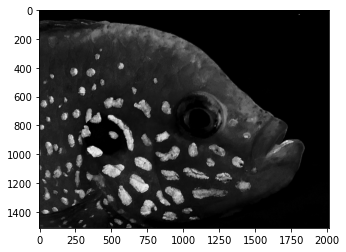

In [ ]:
grey = greyscale(crop)
plt.imshow(grey, cmap="gray")

In [ ]:
def smooth(image):
  """
  takes in a greyscale image and returns the smoothed result

  Input;
   image: 2d numpy array that we want to smooth


  Output:
    output: 2d numpy array that is the smoothed result
  """
  n_im = image.copy().astype(np.float32)
  z = image.shape[0]
  y = image.shape[1]
  for i in range(1, z-1):
    for x in range(1, y-1):
      avg = image[i, x] + image[i, x + 1] + image[i, x - 1]
      avg += image[i - 1, x - 1] + image[i - 1, x] + image[i - 1, x + 1]
      avg += image[i + 1, x + 1] + image[i + 1, x] + image[i + 1, x - 1]
      avg = avg * 1/9
      n_im[i, x] = avg
  return n_im




  


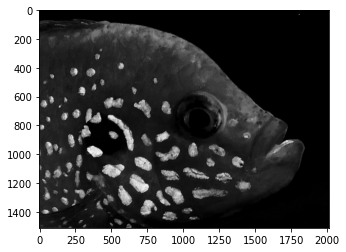

In [ ]:
smoothed = smooth(grey)
plt.imshow(smoothed, cmap = "gray")

In [ ]:
# details
def detail(image, smoothed_im):
  details = np.abs(image - smoothed_im)
  return details



(-0.5, 2015.5, 1511.5, -0.5)

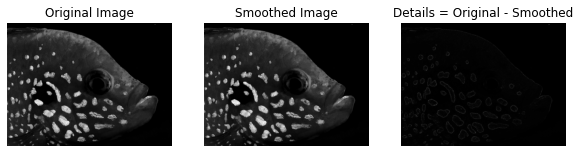

In [ ]:
details = detail(grey, smoothed)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[10, 4])
ax1.set_title("Original Image")
ax2.set_title("Smoothed Image")
ax3.set_title("Details = Original - Smoothed")

im1 = ax1.imshow(grey, cmap="gray")
im2 = ax2.imshow(smoothed, cmap="gray")
im3 = ax3.imshow(details, cmap="gray")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

In [ ]:
def sharpen(image, details, magnification):
  add_details = np.abs(image + magnification * details)
  return add_details

(-0.5, 2015.5, 1511.5, -0.5)

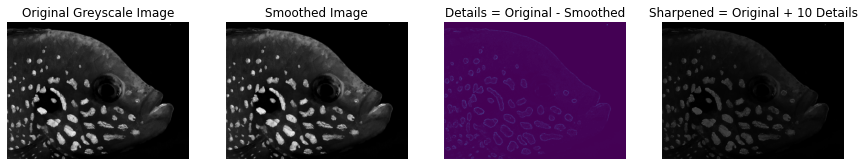

In [ ]:
magnification = 10
sharp = sharpen(grey, details, magnification)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[15, 7])
ax1.set_title("Original Greyscale Image")
ax2.set_title("Smoothed Image")
ax3.set_title("Details = Original - Smoothed")
ax4.set_title("Sharpened = Original + %d Details" % magnification)

im1 = ax1.imshow(grey, cmap="gray")
im2 = ax2.imshow(smoothed, cmap="gray")
im3 = ax3.imshow(details)
im4 = ax4.imshow(sharp/sharp.max(), cmap="gray")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

Method 1 Edge Detection: Best for horizontal and vertical edges.

In [ ]:
def edge(im):
  new_im = im.copy()
  x, y = new_im.shape

  for i in range(1, x - 1):
    for s in range(1, y - 1):
      sum = (im[i - 1, s - 1] - im[i - 1, s + 1])
      sum += (im[i + 1, s + 1] - im[i + 1, s - 1])
      new_im[i, s] = sum 
  return np.abs(new_im)

In [ ]:
edges = edge(grey)
edges, edges.dtype

(array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.31272, 0.05848, 0.032  , ..., 0.     , 0.     , 0.     ],
        [0.3192 , 0.08028, 0.00488, ..., 0.     , 0.     , 0.     ],
        [0.43724, 0.34124, 0.32124, ..., 0.     , 0.     , 0.     ]]),
 dtype('float64'))

(-0.5, 2015.5, 1511.5, -0.5)

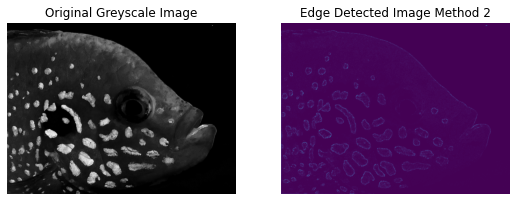

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[9, 6])
ax1.set_title("Original Greyscale Image")
ax2.set_title("Edge Detected Image Method 2")


im1 = ax1.imshow(grey, cmap="gray")
im2 = ax2.imshow(edges)


ax1.axis('off')
ax2.axis('off')


Method 2 Edge Detection: Best for diagnal edges.

In [ ]:
def edge2(im):
  new_im = im.copy()
  x, y = new_im.shape

  for i in range(1, x - 1):
    for j in range(1, y - 1):
      sum = 8*(im[i, j]) - (im[i - 1, j + 1]) - (im[i - 1, j]) - (im[i - 1, j - 1]) - (im[i, j + 1]) - (im[i, j - 1]) - (im[i + 1, j + 1]) - (im[i + 1, j]) - (im[i + 1, j - 1])
      new_im[i, j] = sum 
  return np.abs(new_im)

In [ ]:
edges2 = edge2(grey)
edges2, edges2.dtype

(array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.31272, 0.19192, 0.02   , ..., 0.     , 0.     , 0.     ],
        [0.3192 , 0.7168 , 0.45868, ..., 0.     , 0.     , 0.     ],
        [0.43724, 0.34124, 0.32124, ..., 0.     , 0.     , 0.     ]]),
 dtype('float64'))

(-0.5, 2015.5, 1511.5, -0.5)

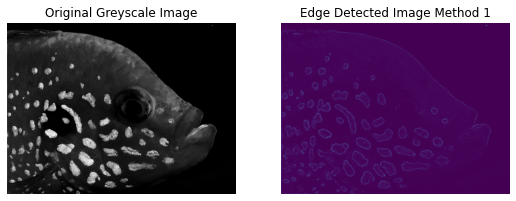

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[9, 6])
ax1.set_title("Original Greyscale Image")
ax2.set_title("Edge Detected Image Method 1")


im1 = ax1.imshow(grey, cmap="gray")
im2 = ax2.imshow(edges2)


ax1.axis('off')
ax2.axis('off')
 

Method 3 Edge Detection: 

In [ ]:
def edge3(im):
  new_im = im.copy()
  x, y = new_im.shape

  for i in range(1, x - 1):
    for j in range(1, y - 1):
      sum = 4 * im[i, j] - (im[i-1, j] + im[i + 1, j] + im[i, j + 1] + im[i, j - 1])
      new_im[i, j] = sum 
  return np.abs(new_im)

In [ ]:
edges3 = edge3(grey)
edges3, edges3.dtype

(array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.31272, 0.06936, 0.02176, ..., 0.     , 0.     , 0.     ],
        [0.3192 , 0.24596, 0.1626 , ..., 0.     , 0.     , 0.     ],
        [0.43724, 0.34124, 0.32124, ..., 0.     , 0.     , 0.     ]]),
 dtype('float64'))

(-0.5, 2015.5, 1511.5, -0.5)

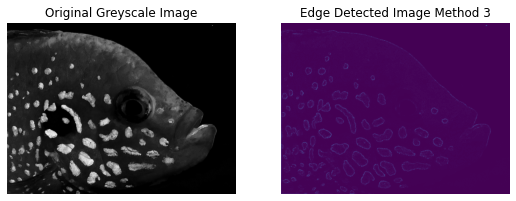

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[9, 6])
ax1.set_title("Original Greyscale Image")
ax2.set_title("Edge Detected Image Method 3")


im1 = ax1.imshow(grey, cmap="gray")
im2 = ax2.imshow(edges3)


ax1.axis('off')
ax2.axis('off')
 

(-0.5, 2015.5, 1511.5, -0.5)

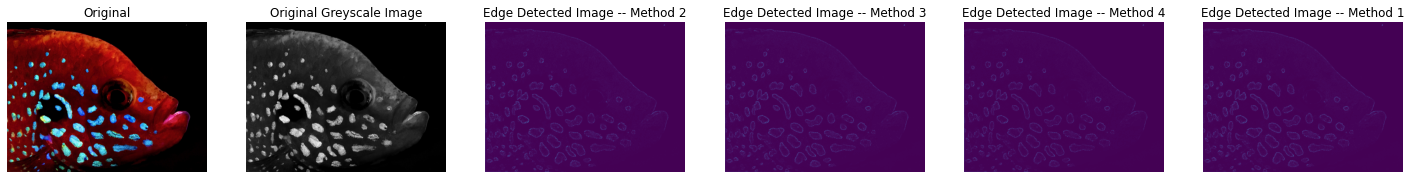

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=[25, 5])
ax1.set_title("Original")
ax2.set_title("Original Greyscale Image")
ax3.set_title("Edge Detected Image -- Method 2")
ax4.set_title("Edge Detected Image -- Method 3")
ax5.set_title("Edge Detected Image -- Method 4")
ax6.set_title("Edge Detected Image -- Method 1")

im1 = ax1.imshow(crop)
im2 = ax2.imshow(grey, cmap="gray")
im3 = ax3.imshow(edges)
im4 = ax4.imshow(edges2)
im4 = ax5.imshow(edges3)
im6 = ax6.imshow(details)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

Comparison

In [ ]:
e1 = sharpen(grey, edges, 1)
e2 = sharpen(grey, edges2, 1)
e3 = sharpen(grey, edges3, 1)
d = sharpen(grey, details, 1)

(-0.5, 2015.5, 1511.5, -0.5)

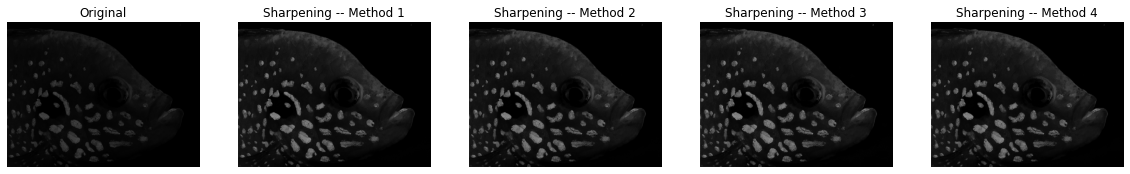

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 6])
ax1.set_title("Original")
ax2.set_title("Sharpening -- Method 1")
ax3.set_title("Sharpening -- Method 2")
ax4.set_title("Sharpening -- Method 3")
ax5.set_title("Sharpening -- Method 4")

emax = max(details.max(), edges.max(), edges2.max(), edges3.max())
emin = min(details.min(), edges.min(), edges2.min(), edges3.min())

im1 = ax1.imshow(grey, cmap="gray", vmax=grey.max()+emax, vmin=grey.min()+emin)
im2 = ax2.imshow(grey + d, cmap="gray", vmax=grey.max()+emax, vmin=grey.min()+emin)
im3 = ax3.imshow(grey + e1, cmap="gray", vmax=grey.max()+emax, vmin=grey.min()+emin)
im4 = ax4.imshow(grey + e2, cmap="gray", vmax=grey.max()+emax, vmin=grey.min()+emin)
im5 = ax5.imshow(grey + e3, cmap="gray", vmax=grey.max()+emax, vmin=grey.min()+emin)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

Sharpen RGB Picture: Pick color to sharpen

In [ ]:
cts = 0

In [ ]:
mod = crop[:,:,cts].astype(np.float32)
mod.max()

255.0

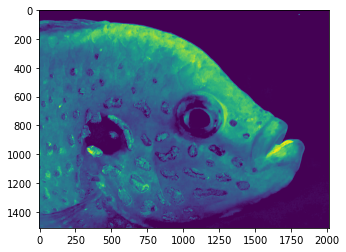

In [ ]:
plt.imshow(mod)

(-0.5, 2015.5, 1511.5, -0.5)

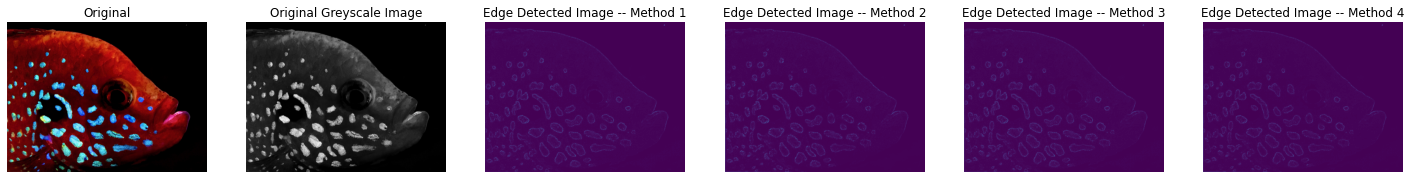

In [ ]:
edges = edge(mod)
edges2 = edge2(mod)
edges3 = edge3(mod)
smoothed = smooth(mod)
details = detail(mod, smoothed)
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=[25, 5])
ax1.set_title("Original")
ax2.set_title("Original Greyscale Image")
ax3.set_title("Edge Detected Image -- Method 1")
ax4.set_title("Edge Detected Image -- Method 2")
ax5.set_title("Edge Detected Image -- Method 3")
ax6.set_title("Edge Detected Image -- Method 4")


im1 = ax1.imshow(crop)
im2 = ax2.imshow(grey, cmap="gray")
im3 = ax3.imshow(details)
im4 = ax4.imshow(edges)
im5 = ax5.imshow(edges2)
im6 = ax6.imshow(edges3)



ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')

In [ ]:
e1 = sharpen(mod, edges, 1)
e2 = sharpen(mod, edges2, 1)
e3 = sharpen(mod, edges3, 1)
d = sharpen(mod, details, 1)
e1 = np.rint(e1*255/e1.max()).astype(np.uint8)
e2 = np.rint(e2*255/e2.max()).astype(np.uint8)
e3 = np.rint(e3*255/e3.max()).astype(np.uint8)
d = np.rint(d*255/d.max()).astype(np.uint8)

In [ ]:
print(mod.max())
print(e1.max())
print(e2.max())
print(e3.max())
print(d.max())


255.0
255
255
255
255


(-0.5, 2015.5, 1511.5, -0.5)

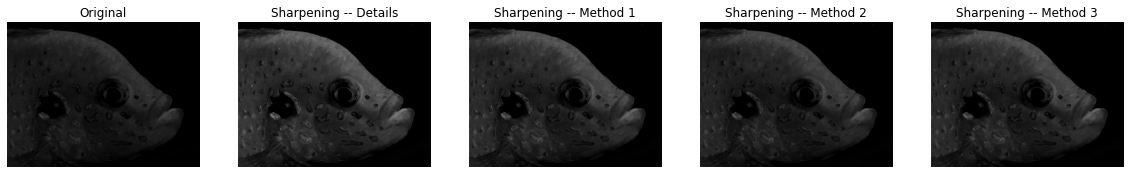

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 6])
ax1.set_title("Original")
ax2.set_title("Sharpening -- Details")
ax3.set_title("Sharpening -- Method 1")
ax4.set_title("Sharpening -- Method 2")
ax5.set_title("Sharpening -- Method 3")

emax = max(details.max(), edges.max(), edges2.max(), edges3.max())
emin = min(details.min(), edges.min(), edges2.min(), edges3.min())

im1 = ax1.imshow(mod, cmap="gray", vmax=mod.max()+emax, vmin=mod.min()+emin)
im2 = ax2.imshow(mod + d, cmap="gray", vmax=mod.max()+emax, vmin=mod.min()+emin)
im3 = ax3.imshow(mod + e1, cmap="gray", vmax=mod.max()+emax, vmin=mod.min()+emin)
im4 = ax4.imshow(mod + e2, cmap="gray", vmax=mod.max()+emax, vmin=mod.min()+emin)
im5 = ax5.imshow(mod + e3, cmap="gray", vmax=mod.max()+emax, vmin=mod.min()+emin)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')

In [ ]:
copy = crop.copy()
copy1 = crop.copy()
copy2 = crop.copy()
copy3 = crop.copy()
copy4 = crop.copy()

In [ ]:
copy[:,:,0] = mod[:,:]
copy1[:,:,0] = d[:,:]
copy2[:,:,0] = e1[:,:]
copy3[:,:,0] = e2[:,:]
copy4[:,:,0] = e3[:,:]

(-0.5, 2015.5, 1511.5, -0.5)

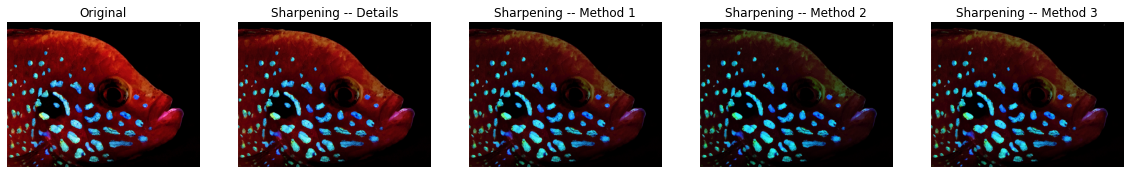

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[20, 6])
ax1.set_title("Original")
ax2.set_title("Sharpening -- Details")
ax3.set_title("Sharpening -- Method 1")
ax4.set_title("Sharpening -- Method 2")
ax5.set_title("Sharpening -- Method 3")

im1 = ax1.imshow(copy)
im2 = ax2.imshow(copy1)
im3 = ax3.imshow(copy2)
im4 = ax4.imshow(copy3)
im5 = ax5.imshow(copy4)


ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')